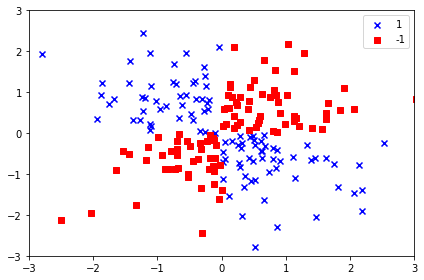

In [1]:
"""비선형 문제 만들기"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
# 가우시안 표준 정규 분포에서 난수 matrix array 생성
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# Xor 논리곱 구하는 함수
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c = 'b',
            marker = 'x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
           c = 'r',
           marker = 's',
           label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

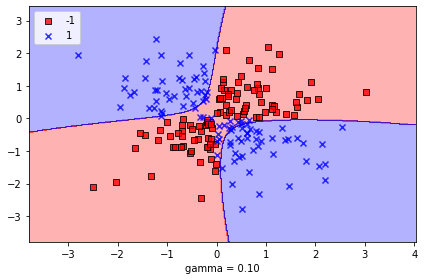

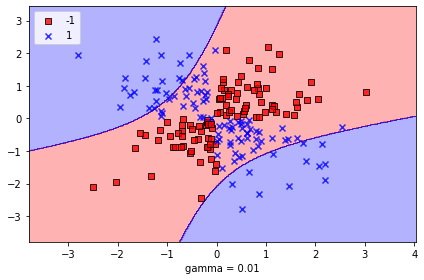

In [10]:
""" 비선형 문제 SVM으로 풀기"""

from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# 2차원 데이터셋의 결정 경계를 시각화
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02) :
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', ' v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                   label = cl, edgecolor = 'black')
    
    # 테스트 샘플을 부각
    if test_idx : 
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', edgecolor = 'black', alpha = 1.0,
                   linewidth = 1, marker = 'o', s = 100, label = 'test set')

svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.10, C = 10.0)
# 저번 SVM 사용 때와 달리 kernel이 linear => rbf가 되었고, gamma 매개변수가 생겼다.
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.xlabel('gamma = 0.10')
plt.tight_layout()
plt.show()

svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.01, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.xlabel('gamma = 0.01')
plt.tight_layout()
plt.show()

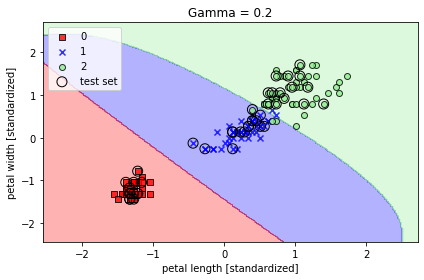

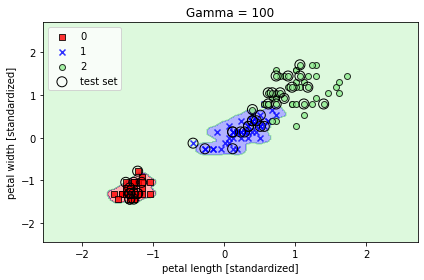

In [20]:
""" 붓꽃 데이터에 RBF커널 SVM 적용해보기"""

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 1, stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.title('Gamma = 0.2')
plt.tight_layout()
plt.show()


# 감마값 변경
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.title('Gamma = 100')
plt.tight_layout()
plt.show()